# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import KFold

# Data Collection and Processing

Mount Google Colab

In [144]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection

In [145]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Dataset/data.csv')

Exploratory Data Analysis

In [146]:
#First 5 rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
# Last 5 rows of the dataset
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [148]:
# Rows and columns in the dataset
data.shape

(569, 33)

In [149]:
# Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [150]:
# Null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [151]:
# checking for duplicate data

print(f"There are {data.duplicated().sum()} duplicates data")
data.loc[data.duplicated(keep=False)].sort_values(by=data.columns.to_list())

There are 0 duplicates data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32


In [152]:
# removing duplicate data, if found

data.drop_duplicates(inplace=True)

In [153]:
# The id column won't be needed
data.drop('id', axis=1, inplace=True)

In [155]:
# CHECK values of "Unnamed: 32"
data['Unnamed: 32'].unique()

array([nan])

In [156]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)

In [157]:
values = {'M':0, 'B':1}
data['diagnosis'] = data['diagnosis'].map(values)
data['diagnosis'].unique()

array([0, 1])

In [159]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data.iloc[:, 1:] = sc.fit_transform(data.iloc[:, 1:])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Checking imbalances in Dataset

In [160]:
data['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

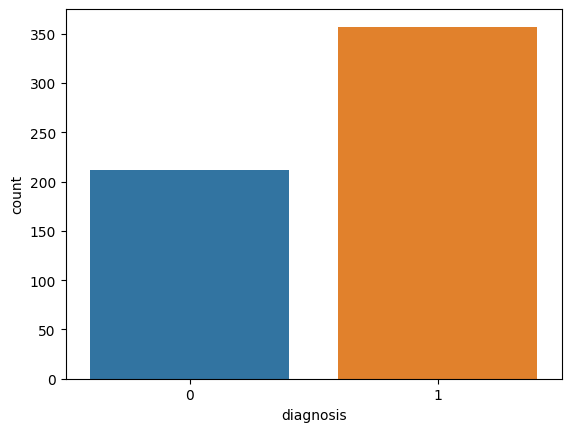

In [161]:
# visualizing using seaborn
sns.countplot(x='diagnosis', data=data)

Over Sampling Data

In [162]:
df = data

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [165]:
# Getting a balanced amount of target values
smt = SMOTE()
X1, y1 = smt.fit_resample(X, y)

In [166]:
# Checking balanced dataset
y1.value_counts()

0    357
1    357
Name: diagnosis, dtype: int64

In [167]:
#Converting y1 into dataFrame for visualization
y1_s = y1.to_frame()

<Axes: xlabel='diagnosis', ylabel='count'>

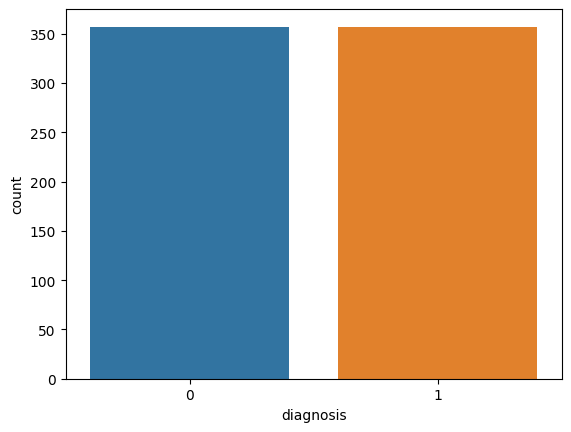

In [168]:
# visualizing after oversampling
sns.countplot(x="diagnosis", data=y1_s)

In [169]:
# statistical measures about the data
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.627417,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,0.000000,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,1.000000,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.000000,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,1.000000,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


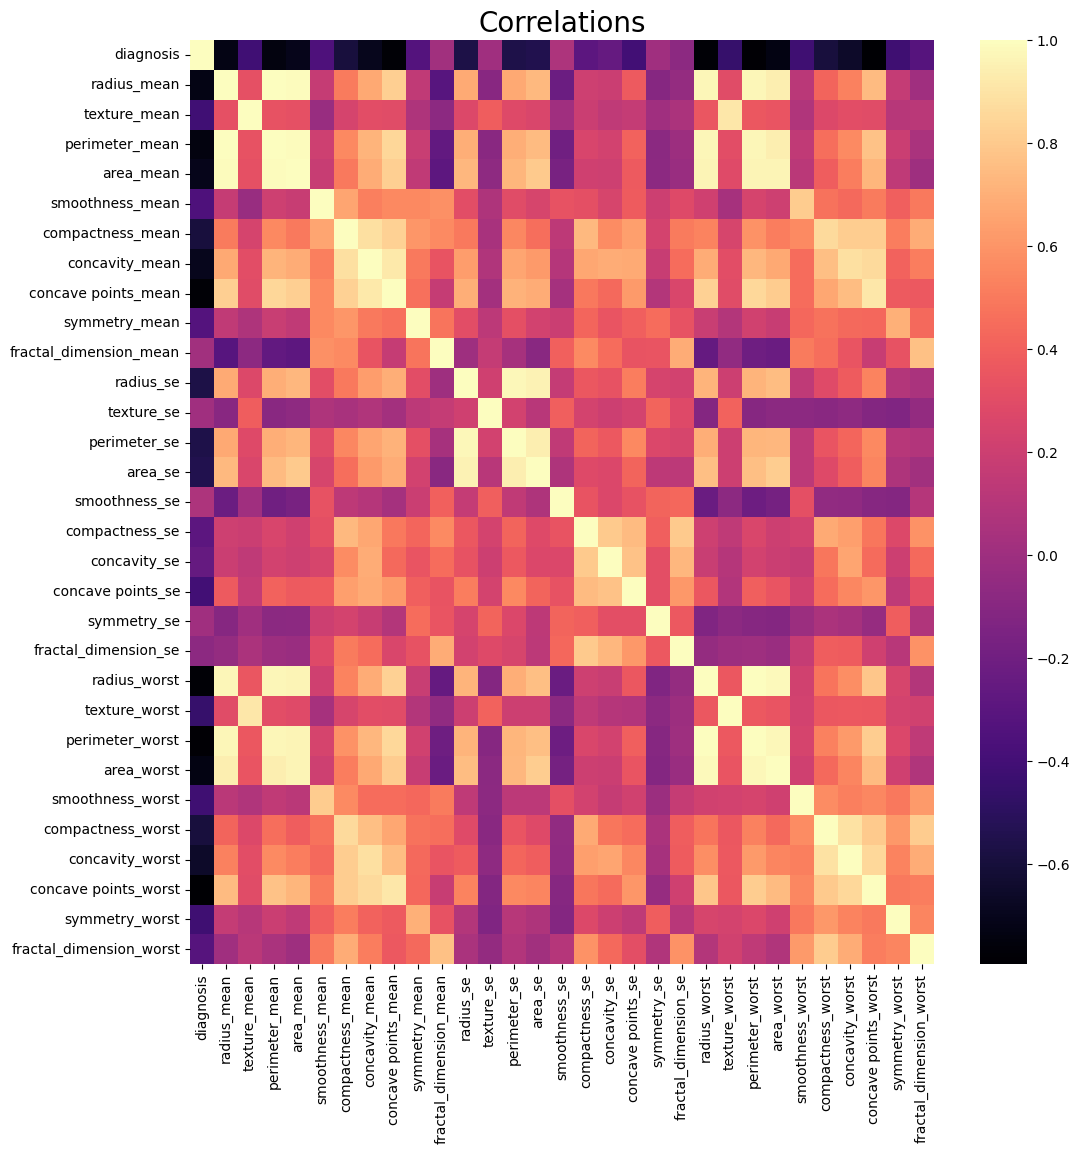

In [178]:
plt.subplots(figsize=[12, 12])
sns.heatmap(df.corr(), cmap='magma')
plt.title('Correlations', fontsize=20)
plt.show()

# Train Test Split

In [171]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=40)

In [172]:
print(X1.shape, X1_train.shape, X1_test.shape)

(714, 30) (571, 30) (143, 30)


# Model Training

In [173]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X1_train, y1_train.ravel())
predictions = rf.predict(X1_test)

# print classification report
print("")
print("")
print("Classification Report after using Random Forest Classifier")
print("")
print("")
print(classification_report(y1_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions)))




#Decison Tree
DT = DecisionTreeClassifier()
DT.fit(X1_train, y1_train.ravel())
predictions1 = DT.predict(X1_test)

# print classification report
print("")
print("")
print("Classification Report after using Decison Tree")
print("")
print("")

print(classification_report(y1_test, predictions1))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions1))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions1))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions1))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions1)))





# XGB classifier machine object
XGB = XGBClassifier()
# train the model on train set
XGB.fit(X1_train, y1_train.ravel())
predictions2 = XGB.predict(X1_test)

# print classification report
print("")
print("")
print("Classification Report after using XGBoost")
print("")
print("")

print(classification_report(y1_test, predictions2))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions2))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions2))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions2))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions2)))




# KNN classifier machine object
print("")
print("")
print("Classification Report after using KNN")
print("")
print("")

KNN =  KNeighborsClassifier()
# train the model on train set
KNN.fit(X1_train, y1_train.ravel())
predictions3 = KNN.predict(X1_test)

# print classification report
print(classification_report(y1_test, predictions3))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions3))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions3))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions3))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions3)))







# support vector machine object
svm = SVC(kernel='linear')
# train the model on train set
svm.fit(X1_train, y1_train.ravel())
predictions4 = svm.predict(X1_test)

# print classification report
print("")
print("")
print("Classification Report after using SVM")
print("")
print("")
print(classification_report(y1_test, predictions4))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions4))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions4))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions4))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions4)))


# logistic regression object
lr = LogisticRegression()
# train the model on train set
lr.fit(X1_train, y1_train.ravel())
predictions5 = lr.predict(X1_test)

# print classification report
print("")
print("")
print("Classification Report after using Logistic Regression")
print("")
print("")
print(classification_report(y1_test, predictions5))
#import result of mse
print("mse=",  metrics.mean_squared_error(y1_test, predictions5))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y1_test, predictions5))
#import result of mae
print("mae=", metrics.mean_absolute_error(y1_test, predictions5))
#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y1_test, predictions5)))



Classification Report after using Random Forest Classifier


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.95      0.98        83

    accuracy                           0.97       143
   macro avg       0.97      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

mse= 0.027972027972027972
msle= 0.013439245144565074
mae= 0.027972027972027972
rmse= 0.16724840200141816


Classification Report after using Decison Tree


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.96      0.95      0.96        83

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

mse= 0.04895104895104895
msle= 0.023518679002988877
mae= 0.04895104895104895
rmse= 0.2212488394343549


Classification Report a

# Model with Highest Accuracy


Accuracy= 0.993006993006993
precision= 1.0
recall= 0.9879518072289156
f1= 0.993939393939394


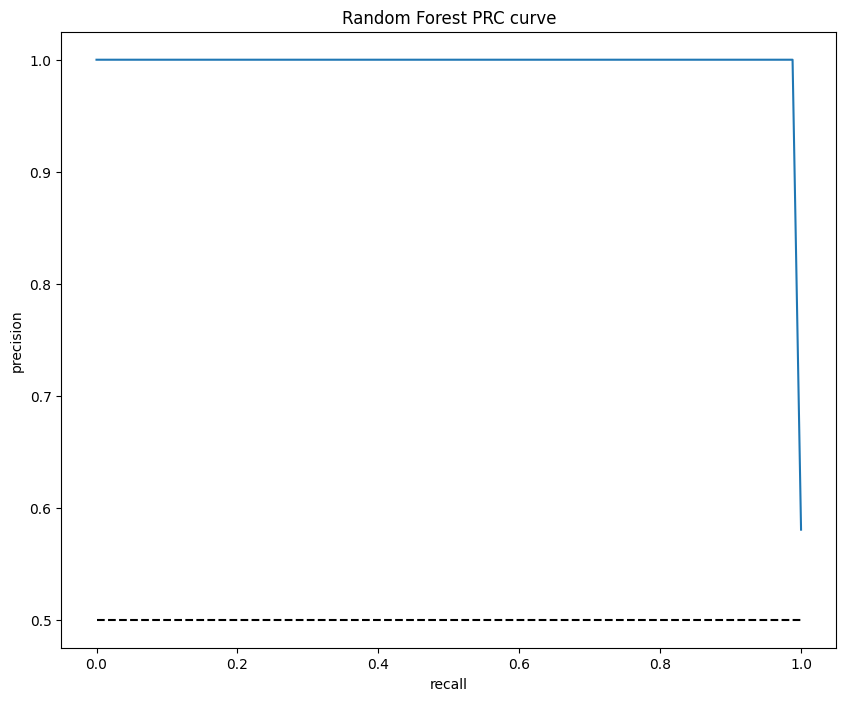

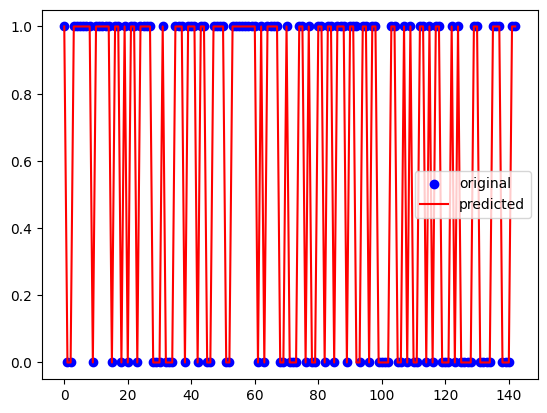

[[60  0]
 [ 1 82]]


In [180]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


predictions_f = predictions4

Accuracy=accuracy_score(y1_test, predictions_f)
precision=precision_score(y1_test, predictions_f)
recall=recall_score(y1_test, predictions_f)
f1=f1_score(y1_test, predictions_f)
print('Accuracy=',Accuracy)
print('precision=',precision)
print('recall=',recall)
print('f1=',f1)

precision, recall, thresholds = precision_recall_curve(y1_test, predictions_f)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'KNN')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Random Forest PRC curve')
plt.show()

y = y1_test
yhat = predictions_f
x = list(range(len(y)))

plt.scatter(x, y, color="blue", label="original")
plt.plot(x, yhat, color="red", label="predicted")
plt.legend()
plt.show()


#Generating Confusion Matrix

cm = confusion_matrix(y1_test, predictions_f)
print(cm)

**Generating** Confusion Matrix

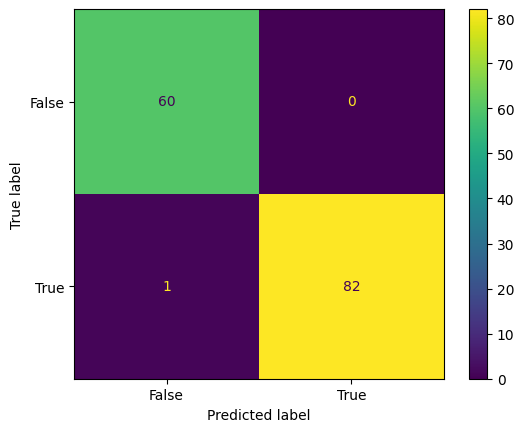

In [181]:
#cm = confusion_matrix(y_test, predictions_final)
#print(cm)

confusion_matrix = metrics.confusion_matrix(y1_test, predictions_f)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Generating ROC Curve

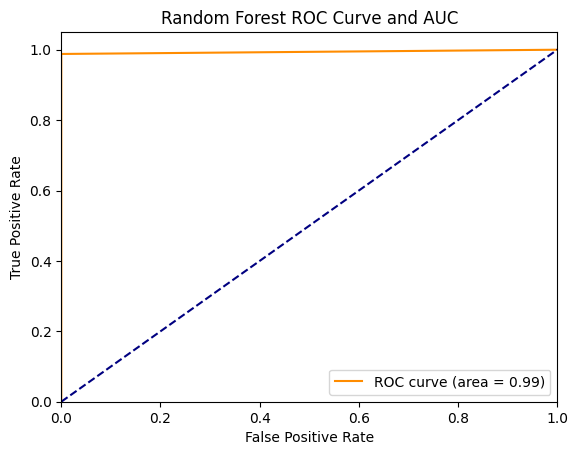

In [182]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, predictions_f)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve and AUC')
plt.legend(loc="lower right")
plt.show()

# Building a Predictive System

In [186]:
input_data = (1.097064, -2.073335,	1.269934,	0.984375,	1.568466,	3.283515,	2.652874,	2.532475,	2.217515,	1.886690,	-1.359293, 1.097064, -2.073335,	1.269934,	0.984375,	1.568466,	3.283515,	2.652874,	2.532475,	2.217515,	1.886690,	-1.359293,	2.303601,	2.001237,	1.307686,	2.616665,	2.109526,	2.296076,	2.750622,	1.937015)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svm.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Breast Cancer')
else:
  print('The Person has Breast Disease')

[0]
The Person does not have a Breast Cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving the trained model

In [187]:
import pickle

In [189]:
filename = 'breastCancer_model.sav'
pickle.dump(svm, open(filename, 'wb'))

In [190]:
# loading the saved model
loaded_model = pickle.load(open('breastCancer_model.sav', 'rb'))

In [191]:
! ls

breastCancer_model.sav	drive  sample_data
